<a href="https://colab.research.google.com/github/Maryam-youssef/Machine-Laerning-notebooks/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Data Cleaning

In [ ]:

dataset.isna().sum()
dataset = raw_dataset.copy().dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


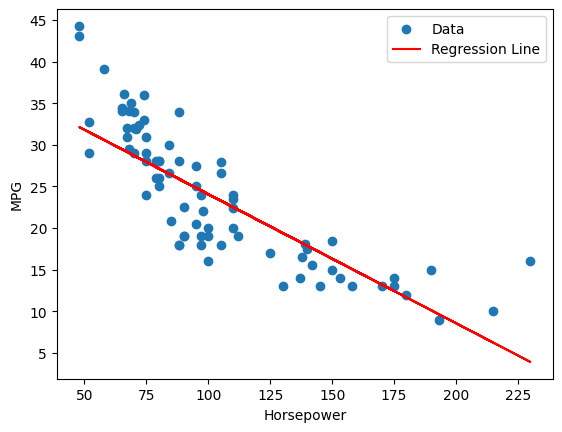

Mean Squared Error: 20.829300555790322


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Select the single-variable input and target
X_train = train_dataset['Horsepower'].values.reshape(-1, 1)
y_train = train_dataset['MPG']

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test_dataset['Horsepower'].values.reshape(-1, 1)
y_test = test_dataset['MPG']

# Plot the data and the regression line
y_pred = model.predict(X_test)

# Plot the regression line with data
plt.scatter(X_test, y_test, label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


In [ ]:

# Select the multi-variable input and target
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
X_train = train_dataset[features]
y_train = train_dataset['MPG']

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test_dataset[features]
y_test = test_dataset['MPG']
y_pred = model.predict(X_test)

# We'll just calculate and print the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (Multi-Variable):', mse)


Mean Squared Error (Multi-Variable): 15.808436237245791


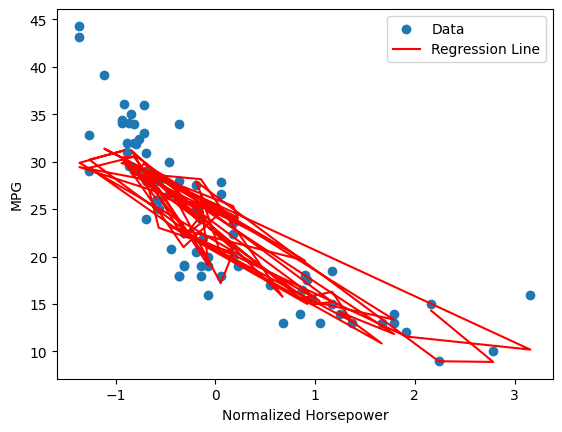

Mean Squared Error (Normalized Multi-Variable): 16.591445431210794


In [ ]:

# Normalize the multi-variable input
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_test.mean()) / X_test.std()

# Fit a linear regression model on normalized data
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)

# Make predictions on the normalized test set
y_pred_norm = model_norm.predict(X_test_norm)

# Plot the regression line with normalized data (example for 'Horsepower')
plt.scatter(X_test_norm['Horsepower'], y_test, label='Data')
plt.plot(X_test_norm['Horsepower'], y_pred_norm, color='red', label='Regression Line')
plt.xlabel('Normalized Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

# Calculate mean squared error for the normalized model
mse_norm = mean_squared_error(y_test, y_pred_norm)
print('Mean Squared Error (Normalized Multi-Variable):', mse_norm)
